### Please install the required Python modules/SDKs

In [14]:
! activate ai-azure-c1

import sys

sys.path.append("/opt/conda/envs/ai-azure-c1/lib/python3.8/site-packages")

### Upgrade the pillow package using the command below:

In [15]:
!pip install Pillow==8.4

## Importing Useful Python Libraries or Packages 

In [16]:
import io
import datetime
import pandas as pd
from PIL import Image
import requests
import io
import glob, os, sys, time, uuid

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

from urllib.parse import urlparse
from io import BytesIO
from PIL import Image, ImageDraw

from video_indexer import VideoIndexer
from azure.cognitiveservices.vision.face import FaceClient
from azure.cognitiveservices.vision.face.models import TrainingStatusType
from msrest.authentication import CognitiveServicesCredentials

### Documentation
- https://docs.microsoft.com/en-us/azure/azure-video-analyzer/video-analyzer-for-media-docs/video-indexer-use-apis

### Set up the Video Analyzer Portal Login:
- https://www.videoindexer.ai/account
- https://www.videoindexer.ai/media/library  - All uploaded video

### Get API Subscription:
https://api-portal.videoindexer.ai/

### Article
- https://medium.com/microsoftazure/visual-brand-detection-with-azure-video-indexer-cd65330b908c

In [17]:
CONFIG = {
    'SUBSCRIPTION_KEY': 'a9780a7cffbf483ab4b8eed454e9da58',
    'LOCATION': 'trial',
    'ACCOUNT_ID': 'd438e42f-a690-40b8-855f-29fe62926919'
}

video_analysis = VideoIndexer(
    vi_subscription_key=CONFIG['SUBSCRIPTION_KEY'],
    vi_location=CONFIG['LOCATION'],
    vi_account_id=CONFIG['ACCOUNT_ID']
)

### Location Parameter
 - For paid service, please use service region i.e. westus2, eastus, etc.
 - For trial or free service, just use "trial" as I have used above. 

In [18]:
video_analysis.check_access_token()

Getting video indexer access token...
Access Token: eyJhbGciOiJSUzI1NiIsInR5cCI6IkpXVCJ9.eyJWZXJzaW9uIjoiMi4wLjAuMCIsIktleVZlcnNpb24iOiI5NGQyMWY0ZDZlY2Y0MzRmOGUzYmRhMDVjMWU3MmRhZCIsIkFjY291bnRJZCI6ImQ0MzhlNDJmLWE2OTAtNDBiOC04NTVmLTI5ZmU2MjkyNjkxOSIsIkFjY291bnRUeXBlIjoiVHJpYWwiLCJQZXJtaXNzaW9uIjoiQ29udHJpYnV0b3IiLCJFeHRlcm5hbFVzZXJJZCI6IkI0Qjg4QjE2RTY5QzQyREZCRDI1RjE0QkI2NEUzMUJGIiwiVXNlclR5cGUiOiJNaWNyb3NvZnRDb3JwQWFkIiwiSXNzdWVyTG9jYXRpb24iOiJUcmlhbCIsIm5iZiI6MTcwMTYxNjEwMCwiZXhwIjoxNzAxNjIwMDAwLCJpc3MiOiJodHRwczovL2FwaS52aWRlb2luZGV4ZXIuYWkvIiwiYXVkIjoiaHR0cHM6Ly9hcGkudmlkZW9pbmRleGVyLmFpLyJ9.xj42oOijTzFPBvvXIqclstWlK5NJsTQXZe-MthwT7s5DXI3kaP5wAZf_HNaM9mSCT8YC6Osl4r7jDwL8MuA7PDAZdqDxw8mH1JwJ136opTb4nninT9z5iomk64kxQo8iJervgaH9yBgQvEI8U21hgpYDRBqP8sL5Dh8kT30GPeH5zKyrDWX5fmObf2jm9lZwsBRPNO31yLdSPtuGRlAIF9aQEvpeWgnwtrSXTUXIPaY0f9NfHmOGqKBLuXIwwmDFK3AFRgXny9TrthqpQeFaQzno9lA73Ulibkg7qhs3ZostfvUJi8a-GOgW74QAvVvNOP0NNe-IxV3nc4vEASoX6g


# Additional Resource:
## Uploading a video from workspace environment to Video Analyzer portal

In [19]:
uploaded_video_id = video_analysis.upload_to_video_indexer(
   input_filename='/home/workspace/avkash-kiosk-2.mp4',
   video_name='avkash-kiosk-2',  # unique identifier for video in Video Indexer platform
   video_language='English'
)

Uploading video to video indexer...


In [20]:
video_id = uploaded_video_id

In [21]:
video_id

'648379705e'

In [23]:
video_analysis.get_video_info(video_id)

Getting video info for: 648379705e


{'partition': None,
 'description': None,
 'privacyMode': 'Private',
 'state': 'Processed',
 'accountId': 'd438e42f-a690-40b8-855f-29fe62926919',
 'id': '648379705e',
 'name': 'avkash-kiosk-2',
 'userName': 'ODL_User 244706',
 'created': '2023-12-03T15:13:31.49+00:00',
 'isOwned': True,
 'isEditable': True,
 'isBase': True,
 'durationInSeconds': 26,
 'duration': '0:00:26.499856',
 'summarizedInsights': {'name': 'avkash-kiosk-2',
  'id': '648379705e',
  'privacyMode': 'Private',
  'duration': {'time': '0:00:26.499856', 'seconds': 26.5},
  'thumbnailVideoId': '648379705e',
  'thumbnailId': '365b8914-d054-4b88-baa9-1c08f65897da',
  'faces': [{'videoId': '648379705e',
    'confidence': 0,
    'description': None,
    'title': None,
    'thumbnailId': '11beac5a-49b2-45aa-ae1d-fe28625b98b4',
    'seenDuration': 26.5,
    'seenDurationRatio': 1,
    'id': 1000,
    'name': 'Unknown #1',
    'appearances': [{'startTime': '0:00:00',
      'endTime': '0:00:26.4998556',
      'startSeconds': 0,
 

In [24]:
info = video_analysis.get_video_info(video_id, video_language='English')

Getting video info for: 648379705e


## Processing RAW Json 
### Getting a list of thumbnails where we find human face

In [25]:
if len(info['videos'][0]['insights']['faces'][0]['thumbnails']):
    print("We found {} faces in this video.".format(str(len(info['videos'][0]['insights']['faces'][0]['thumbnails']))))

We found 7 faces in this video.


In [26]:
info['videos'][0]['insights']['faces'][0]['thumbnails']

[{'id': '17e035d2-8d6c-4a49-9abb-14e6eed21cfe',
  'fileName': 'FaceInstanceThumbnail_17e035d2-8d6c-4a49-9abb-14e6eed21cfe.jpg',
  'instances': [{'adjustedStart': '0:00:00',
    'adjustedEnd': '0:00:00.0335195',
    'start': '0:00:00',
    'end': '0:00:00.0335195'}]},
 {'id': 'adb28dca-30d8-4ce6-bc3e-e828fbff9fd4',
  'fileName': 'FaceInstanceThumbnail_adb28dca-30d8-4ce6-bc3e-e828fbff9fd4.jpg',
  'instances': [{'adjustedStart': '0:00:05.2494777',
    'adjustedEnd': '0:00:05.2829972',
    'start': '0:00:05.2494777',
    'end': '0:00:05.2829972'}]},
 {'id': '5dae6498-d877-47cb-9b0a-82eea2072fa6',
  'fileName': 'FaceInstanceThumbnail_5dae6498-d877-47cb-9b0a-82eea2072fa6.jpg',
  'instances': [{'adjustedStart': '0:00:10.3860333',
    'adjustedEnd': '0:00:10.4195528',
    'start': '0:00:10.3860333',
    'end': '0:00:10.4195528'}]},
 {'id': '7e969eb7-0761-4fda-958a-bca802eeb12e',
  'fileName': 'FaceInstanceThumbnail_7e969eb7-0761-4fda-958a-bca802eeb12e.jpg',
  'instances': [{'adjustedStart': '0

## Getting Thumbnail ID from the Analysis JSON 

In [27]:
images = []
img_raw = []
img_strs = []
for each_thumb in info['videos'][0]['insights']['faces'][0]['thumbnails']:
    if 'fileName' in each_thumb and 'id' in each_thumb:
        file_name = each_thumb['fileName']
        thumb_id = each_thumb['id']
        img_code = video_analysis.get_thumbnail_from_video_indexer(video_id,  thumb_id)
        img_strs.append(img_code)
        img_stream = io.BytesIO(img_code)
        img_raw.append(img_stream)
        img = Image.open(img_stream)
        images.append(img)

Getting thumbnail from video: 648379705e, thumbnail: 17e035d2-8d6c-4a49-9abb-14e6eed21cfe
Getting thumbnail from video: 648379705e, thumbnail: adb28dca-30d8-4ce6-bc3e-e828fbff9fd4
Getting thumbnail from video: 648379705e, thumbnail: 5dae6498-d877-47cb-9b0a-82eea2072fa6
Getting thumbnail from video: 648379705e, thumbnail: 7e969eb7-0761-4fda-958a-bca802eeb12e
Getting thumbnail from video: 648379705e, thumbnail: 67bc7da1-8873-48a9-913b-25a781ecca57
Getting thumbnail from video: 648379705e, thumbnail: ad3f3bd7-b324-40c3-bd02-58a5516b91dd
Getting thumbnail from video: 648379705e, thumbnail: 2c6b20c1-704f-42ee-a38c-d065fa7ce56f


## Now, let's view the face-specific thumbnails 

{'comment': b'Lavc59.37.100\x00'}
{'comment': b'Lavc59.37.100\x00'}
{'comment': b'Lavc59.37.100\x00'}
{'comment': b'Lavc59.37.100\x00'}
{'comment': b'Lavc59.37.100\x00'}
{'comment': b'Lavc59.37.100\x00'}
{'comment': b'Lavc59.37.100\x00'}


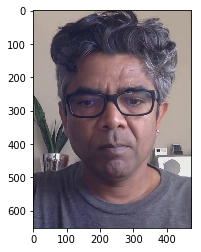

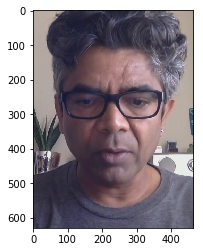

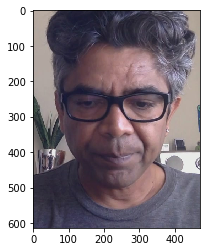

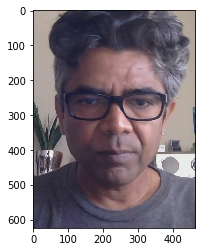

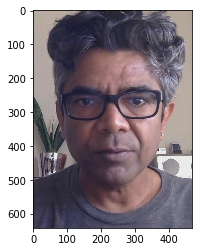

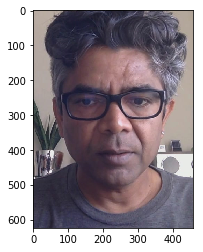

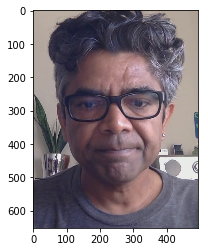

In [28]:
for img in images:
    print(img.info)
    plt.figure()
    plt.imshow(img)

## Let's extract and save these face thumbnails to the workspace
- Download from Cloud

In [29]:
i = 1
for img in images:
    print(type(img))
    img.save('human-face' + str(i) + '.jpg')
    i= i+ 1

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>


## Verify the download process 

In [30]:
!ls human-face*.jpg

human-face1.jpg  human-face3.jpg  human-face5.jpg  human-face7.jpg
human-face2.jpg  human-face4.jpg  human-face6.jpg


## --> Getting thumbnail from the SDK 

In [31]:
# Enter one of the thumbnail output you got from the previous cell, 
# under the "Getting Thumbnail ID from the Analysis JSON" section.
thumbnail_id='2c6b20c1-704f-42ee-a38c-d065fa7ce56f'

In [32]:
img_code = video_analysis.get_thumbnail_from_video_indexer(video_id,  thumbnail_id)
print(img_code)

Getting thumbnail from video: 648379705e, thumbnail: 2c6b20c1-704f-42ee-a38c-d065fa7ce56f
b'\xff\xd8\xff\xfe\x00\x10Lavc59.37.100\x00\xff\xdb\x00C\x00\x08\x04\x04\x04\x04\x04\x05\x05\x05\x05\x05\x05\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x06\x07\x07\x07\x08\x08\x08\x07\x07\x07\x06\x06\x07\x07\x08\x08\x08\x08\t\t\t\x08\x08\x08\x08\t\t\n\n\n\x0c\x0c\x0b\x0b\x0e\x0e\x0e\x11\x11\x14\xff\xc4\x00\xa9\x00\x00\x01\x05\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x05\x04\x00\x02\x01\x06\x07\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x10\x00\x02\x01\x03\x02\x03\x06\x03\x06\x03\x06\x04\x04\x04\x04\x07\x01\x02\x03\x04\x00\x11\x12!A\x051"aqQ\x06\x132\x81\x91B\xb1\xa1\x07\x14#R\xd1\xc1\xe1rb\x15\xf03\x92\xf1\x82$C\xa2S\x16\x83c\xc2s%5\xd2\xb2eE4\xb3\x93T\x94\x11\x00\x02\x02\x02\x02\x02\x01\x03\x03\x04\x03\x01\x01\x01\x00\x00\x00\x01\x02\x11!\x03\x121A\x04Q2\x13"\x14aq\x05\x91R#\x81\xc1\xa13\xd1B\xff\xc0\x00\x11\x08\x02\x8c\x01\xee\

## --> Converting encoded image to visible image

Getting thumbnail from video: 648379705e, thumbnail: 2c6b20c1-704f-42ee-a38c-d065fa7ce56f


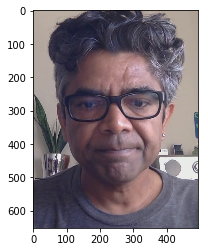

In [33]:
img_code = video_analysis.get_thumbnail_from_video_indexer(video_id,  thumbnail_id)
img_stream = io.BytesIO(img_code)
img = Image.open(img_stream)
imshow(img)

## Emotion from the Video Analyzer

In [34]:
info['summarizedInsights']['sentiments']

[{'sentimentKey': 'Neutral',
  'seenDurationRatio': 1,
  'appearances': [{'startTime': '0:00:00',
    'endTime': '0:00:26.499856',
    'startSeconds': 0,
    'endSeconds': 26.5}]},
 {'sentimentKey': 'Negative',
  'seenDurationRatio': 0.083,
  'appearances': [{'startTime': '0:00:07.48',
    'endTime': '0:00:09.68',
    'startSeconds': 7.5,
    'endSeconds': 9.7}]}]

In [35]:
info['summarizedInsights']['emotions']

[{'type': 'Anger',
  'seenDurationRatio': 0.083,
  'appearances': [{'startTime': '0:00:07.48',
    'endTime': '0:00:09.68',
    'startSeconds': 7.5,
    'endSeconds': 9.7}]}]

# Collecting Faces from  Video Analyzer

In [36]:
AVKASH_FACE_KEY = "42b0e10b5e044d47a98c37611212b956"
AVKASH_FACE_ENDPOINT = "https://face244706.cognitiveservices.azure.com/"

In [37]:
# Create a client
face_client = FaceClient(AVKASH_FACE_ENDPOINT, CognitiveServicesCredentials(AVKASH_FACE_KEY))

In [38]:
face_client.api_version

'1.0'

https://github.com/Azure-Samples/cognitive-services-quickstart-code/blob/master/python/Face/DetectIdentifyFace.py

# Creating Person Model Based on Faces in the Video

### We have already downloaded and saved the face thumbnails in the previous steps
- We will be using those face thumbnails here to build the Person model

In [39]:
PERSON_GROUP_ID = str(uuid.uuid4())
person_group_name = 'person-avkash'

In [40]:
## This code is taken from Azure Face SDK 
## ---------------------------------------
def build_person_group(client, person_group_id, pgp_name):
    print('Create and build a person group...')
    # Create empty Person Group. Person Group ID must be lower case, alphanumeric, and/or with '-', '_'.
    print('Person group ID:', person_group_id)
    client.person_group.create(person_group_id = person_group_id, name=person_group_id)

    # Create a person group person.
    human_person = client.person_group_person.create(person_group_id, pgp_name)
    # Find all jpeg human images in working directory.
    human_face_images = [file for file in glob.glob('*.jpg') if file.startswith("human-face")]
    # Add images to a Person object
    for image_p in human_face_images:
        with open(image_p, 'rb') as w:
            client.person_group_person.add_face_from_stream(person_group_id, human_person.person_id, w)

    # Train the person group, after a Person object with many images were added to it.
    client.person_group.train(person_group_id)

    # Wait for training to finish.
    while (True):
        training_status = client.person_group.get_training_status(person_group_id)
        print("Training status: {}.".format(training_status.status))
        if (training_status.status is TrainingStatusType.succeeded):
            break
        elif (training_status.status is TrainingStatusType.failed):
            client.person_group.delete(person_group_id=PERSON_GROUP_ID)
            sys.exit('Training the person group has failed.')
        time.sleep(5)


In [41]:
build_person_group(face_client, PERSON_GROUP_ID, person_group_name)

Create and build a person group...
Person group ID: 799b0aa7-3ca8-4fcd-98c7-c4213e821300
Training status: running.
Training status: succeeded.


# Making sure the Person model has faces and they all belong to the same person


In [42]:
'''
Detect all faces in query image list, then add their face IDs to a new list.
'''
def detect_faces(client, query_images_list):
    print('Detecting faces in query images list...')

    face_ids = {} # Keep track of the image ID and the related image in a dictionary
    for image_name in query_images_list:
        image = open(image_name, 'rb') # BufferedReader
        print("Opening image: ", image.name)
        time.sleep(5)

        # Detect the faces in the query images list one at a time, returns list[DetectedFace]
        faces = client.face.detect_with_stream(image)  

        # Add all detected face IDs to a list
        for face in faces:
            print('Face ID', face.face_id, 'found in image', os.path.splitext(image.name)[0]+'.jpg')
            # Add the ID to a dictionary with image name as a key.
            # This assumes there is only one face per image (since you can't have duplicate keys)
            face_ids[image.name] = face.face_id

    return face_ids

In [43]:
test_images = [file for file in glob.glob('*.jpg') if file.startswith("human-face")]

In [44]:
test_images

['human-face4.jpg',
 'human-face6.jpg',
 'human-face1.jpg',
 'human-face7.jpg',
 'human-face5.jpg',
 'human-face2.jpg',
 'human-face3.jpg']

In [45]:
ids = detect_faces(face_client, test_images)

Detecting faces in query images list...
Opening image:  human-face4.jpg
Face ID c69002e7-6174-4386-a1de-f3a1b19b9946 found in image human-face4.jpg
Opening image:  human-face6.jpg
Face ID 907a0bd8-28bf-471b-b967-7814c269ee3c found in image human-face6.jpg
Opening image:  human-face1.jpg
Face ID c6c4c88d-a8a8-49f5-8e3c-7ac2666aa9cb found in image human-face1.jpg
Opening image:  human-face7.jpg
Face ID 3ac983f3-f8c4-4baa-a1c7-a0fb3b09a5d2 found in image human-face7.jpg
Opening image:  human-face5.jpg
Face ID 26764d0a-d5e8-450c-9303-7bf915364de7 found in image human-face5.jpg
Opening image:  human-face2.jpg
Face ID 688db889-8c7c-4dd6-8df6-416bf848ddf2 found in image human-face2.jpg
Opening image:  human-face3.jpg
Face ID bb3fa126-053c-44c0-a097-621d5ea2857f found in image human-face3.jpg


In [46]:
ids

{'human-face4.jpg': 'c69002e7-6174-4386-a1de-f3a1b19b9946',
 'human-face6.jpg': '907a0bd8-28bf-471b-b967-7814c269ee3c',
 'human-face1.jpg': 'c6c4c88d-a8a8-49f5-8e3c-7ac2666aa9cb',
 'human-face7.jpg': '3ac983f3-f8c4-4baa-a1c7-a0fb3b09a5d2',
 'human-face5.jpg': '26764d0a-d5e8-450c-9303-7bf915364de7',
 'human-face2.jpg': '688db889-8c7c-4dd6-8df6-416bf848ddf2',
 'human-face3.jpg': 'bb3fa126-053c-44c0-a097-621d5ea2857f'}

### Verifying that 2 random images from the list belong to the same person
- #### Note: So far we have not used the face recognition part, only face detection.

In [47]:
# Verification example for faces of the same person.
verify_result = face_client.face.verify_face_to_face(ids['human-face1.jpg'], ids['human-face2.jpg'])

In [48]:
if verify_result.is_identical:
    print("Faces are of the same (Positive) person, similarity confidence: {}.".format(verify_result.confidence))
else:
    print("Faces are of different (Negative) persons, similarity confidence: {}.".format(verify_result.confidence))

Faces are of the same (Positive) person, similarity confidence: 0.93972.


## Matching face from ID card with face from Video Analyzer 

In [49]:
def show_image_in_cell(face_url):
    response = requests.get(face_url)
    img = Image.open(BytesIO(response.content))
    plt.figure(figsize=(10,5))
    plt.imshow(img)
    plt.show()

In [50]:
dl_source_url = 'https://raw.githubusercontent.com/MatthewDGeorge/Kiosk/8d74e9c2e8c71dd2b5ac250abb0a8ef8f2cc5a5e/starter/digital_id_template/ca-dl-avkash-chauhan.png'


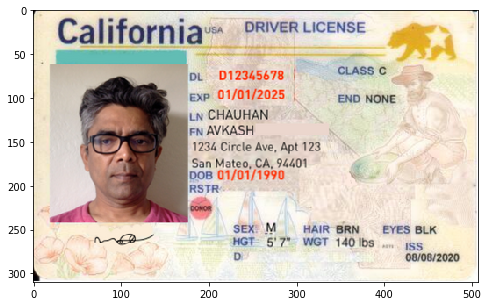

In [51]:
show_image_in_cell(dl_source_url)

In [52]:
## -------
## Reading file locally
## -------
# If I had image file locally, I would have used the following method
# dl_image = open('/Users/avkashchauhan99/work/avkash/udacity/cal-dl.png', 'rb')
# dl_faces = face_client.face.detect_with_stream(dl_image)  

In [53]:
dl_faces = face_client.face.detect_with_url(dl_source_url) 

## Viewing Face ID and then saving it into the list of already saved Face IDs

In [54]:
for face in dl_faces:
    print('Face ID', face.face_id, 'found in image', dl_source_url)
    # Add the ID to a dictionary with image name as a key.
    # This assumes there is only one face per image (since you can't have duplicate keys)
    ids['ca-dl-avkash-chauhan.png'] = face.face_id

Face ID e4e39bc1-c067-43c9-86e6-09706c58a009 found in image https://raw.githubusercontent.com/MatthewDGeorge/Kiosk/8d74e9c2e8c71dd2b5ac250abb0a8ef8f2cc5a5e/starter/digital_id_template/ca-dl-avkash-chauhan.png


## --> Now, we have 7 + 1 = 8 Face IDs in our Face ID list

In [55]:
ids

{'human-face4.jpg': 'c69002e7-6174-4386-a1de-f3a1b19b9946',
 'human-face6.jpg': '907a0bd8-28bf-471b-b967-7814c269ee3c',
 'human-face1.jpg': 'c6c4c88d-a8a8-49f5-8e3c-7ac2666aa9cb',
 'human-face7.jpg': '3ac983f3-f8c4-4baa-a1c7-a0fb3b09a5d2',
 'human-face5.jpg': '26764d0a-d5e8-450c-9303-7bf915364de7',
 'human-face2.jpg': '688db889-8c7c-4dd6-8df6-416bf848ddf2',
 'human-face3.jpg': 'bb3fa126-053c-44c0-a097-621d5ea2857f',
 'ca-dl-avkash-chauhan.png': 'e4e39bc1-c067-43c9-86e6-09706c58a009'}

## Perform face verification between the Face ID from the identity card and one of the Face IDs from the video

In [56]:
# Verification example for faces of the same person.
dl_verify_result = face_client.face.verify_face_to_face(ids['human-face4.jpg'], ids['ca-dl-avkash-chauhan.png'])

In [57]:
if dl_verify_result.is_identical:
    print("Faces are of the same (Positive) person, similarity confidence: {}.".format(dl_verify_result.confidence))
else:
    print("Faces are of different (Negative) persons, similarity confidence: {}.".format(dl_verify_result.confidence))

Faces are of the same (Positive) person, similarity confidence: 0.79982.


In [58]:
ids['ca-dl-avkash-chauhan.png']

'e4e39bc1-c067-43c9-86e6-09706c58a009'

In [59]:
ids.values()

dict_values(['c69002e7-6174-4386-a1de-f3a1b19b9946', '907a0bd8-28bf-471b-b967-7814c269ee3c', 'c6c4c88d-a8a8-49f5-8e3c-7ac2666aa9cb', '3ac983f3-f8c4-4baa-a1c7-a0fb3b09a5d2', '26764d0a-d5e8-450c-9303-7bf915364de7', '688db889-8c7c-4dd6-8df6-416bf848ddf2', 'bb3fa126-053c-44c0-a097-621d5ea2857f', 'e4e39bc1-c067-43c9-86e6-09706c58a009'])

## Matching Face ID from the identity card with Video Analyzer Person Model 

In [60]:
# A list of Face ID
ids

{'human-face4.jpg': 'c69002e7-6174-4386-a1de-f3a1b19b9946',
 'human-face6.jpg': '907a0bd8-28bf-471b-b967-7814c269ee3c',
 'human-face1.jpg': 'c6c4c88d-a8a8-49f5-8e3c-7ac2666aa9cb',
 'human-face7.jpg': '3ac983f3-f8c4-4baa-a1c7-a0fb3b09a5d2',
 'human-face5.jpg': '26764d0a-d5e8-450c-9303-7bf915364de7',
 'human-face2.jpg': '688db889-8c7c-4dd6-8df6-416bf848ddf2',
 'human-face3.jpg': 'bb3fa126-053c-44c0-a097-621d5ea2857f',
 'ca-dl-avkash-chauhan.png': 'e4e39bc1-c067-43c9-86e6-09706c58a009'}

## Using the face ID from the identify card and matching the identity with the Person Group model

In [61]:
# Enter the face ID of ca-dl-avkash-chauhan.png from the output of the cell above
get_the_face_id_from_the_driving_license = 'e4e39bc1-c067-43c9-86e6-09706c58a009'

In [62]:
person_gp_results = face_client.face.identify([get_the_face_id_from_the_driving_license], PERSON_GROUP_ID)

In [63]:
for result in person_gp_results:
    for candidate in result.candidates:
        print("The Identity match confidence is {}".format(candidate.confidence))

The Identity match confidence is 0.81424
